<center><h2>Bayesian Optimization</h2></center>

<center><h2>How do adaptive test for continuous features?</h2></center>

You are optimizing a landing page for your pizza delivery website.
 
You have tested blue vs red button for call-to-action. Your Product Manager wants to which shade of red is best (Similar to [Google testing for 40 shades of blue](https://iterativepath.wordpress.com/2012/10/29/testing-40-shades-of-blue-ab-testing/)!)

Continuous features for buttons:

- Continuously vary color
- Continuously vary size
- Continuously vary shape

How to scale up multi-armed bandits?

<center><h2>Learning Outcomes</h2></center>

__By the end of this session, you should be able to__:

- Define Bayesian Optimization in your own words.
- Explain how Bayesian Optimization uses Gaussian Process.
- List the steps in Bayesian Optimization.


<center><h2>Bayesian Optimization</h2></center>



A general method for "learning to optimize" an unknown function.

Efficient sampling of all possible spaces, especially when the spaces are continuous and dependent.

[Source](https://towardsdatascience.com/shallow-understanding-on-bayesian-optimization-324b6c1f7083)

How does BO work?
----

<center><img src="images/bo.jpeg" width="75%"/></center>

Use previous observations of a function to determine the __next best__ point to sample the function. 

<center><h2>Bayesian Optimization Recipe</h2></center>

1. Define domain (e.g., color spectrum)
1. Define covariance function (e.g., how much do you think reward will change as a function of color? High or low variance over the domain?)
1. Repeat until satisfied (or out of budget)
    - Sample from best possible region, a combination of previous samples and where there is good potential for better values) 
    - Based on the sample re-estimate the posterior 
1. Return the best value

Technical steps for Bayesian Optimization
----

1) Build Gaussian Process (GP) with points sampled so far


2) Optimize the fit of the GP

3) Find the point with the highest Expected Improvement.


4) Return optimal next-best-point to sample

5) Repeat steps 1-4 until satisfied (or out of budget)

6) Return scalar(s) that has the largest rewards(s).

What the hell is a Gaussian process (GP)?
------
<br>
<center><img src="images/gp.png" width="700"/></center>

What is statistical Process?

A statistical object (typically a distribution) that changes over time and space.

a Gaussian process (GP) is the generalization of a standard Gaussian distribution.

GP is a __distribution over functions__ (Gaussian distribution is a distribution over random variables).

GP parameters
-----

A Gaussian distribution is completely specified by its mean and variance

A GP is completely specified by its mean __function__ m(__x__), and covariance __function__ k(__x__,__x′__).

GP: Points go in, Normal Distributions come out
-----

<br>
<center><img src="images/gp.png" width="700"/></center>

We can think of a GP as a function that, instead of returning a scalar f(x), returns __the mean and variance__ of a normal distribution over the possible values of f at x.


GP formalism
------

For a set of data points x<sub></sub>1:n<sub></sub> = {x<sub>1</sub>,…,x<sub>n</sub>}x1:n={x1,…,xn},   
we assume that the values of the loss function f<sub>1:n</sub>={f(x<sub>1</sub>),…,f(x<sub>n</sub>)} can be described by a multivariate Gaussian distribution:

f<sub>1:n</sub> ∼ N(m(x<sub>1:n</sub>), K)

GP FTW
-----

<center><img src="images/after.png" width="700"/></center>

It results in a posterior distribution over the loss function that is analytically tractable. This allows us to update our beliefs of what function looks like, after we have computed the loss for a new set of hyperparameters.

Acquisition functions
------

To find the next best point to sample from, we will choose the point that maximizes an acquisition function. 

This is a function of the posterior distribution over the function, that describes the utility for all values that we could search for. 

The values with the highest utility, will be the values for which we compute the loss next.

Expected Improvement (EI) function
-----

$$EI(x) = 𝔼 [max{0, f(x) - f(x̂)}]$$

The most popular acquisition function

EI properties
-------

1. EI is high when the (posterior) expected value of the loss $μ_x$ is higher than the current best value f(x̂)
2. EI is high when the uncertainty $σ_x$ around the point x is high.

<center><h2>Expected Improvement is learned exploitation versus exploration</h2></center>

Initially, we just guess (hopefully based on informed priors).

Over time, we empirically learn where we can maximize or where we should explore.

Bayesian Optimization is way better than any version of Epsilon-Greedy.

[Let's check out a demo](https://distill.pub/2020/bayesian-optimization/)

EI Example: Early in Training
-------
<br>
<center><img src="images/ep1.png" width="500"/></center>

"Unknown Unknowns": A single know value and high variances

EI Example: Later in Training
-------
<br>
<center><img src="images/ep.png" width="650"/></center>

Known optimium values with low variance.

BO results
-----

<center><img src="http://scikit-learn.org/0.17/_images/plot_gp_regression_0011.png" width="700"/></center>

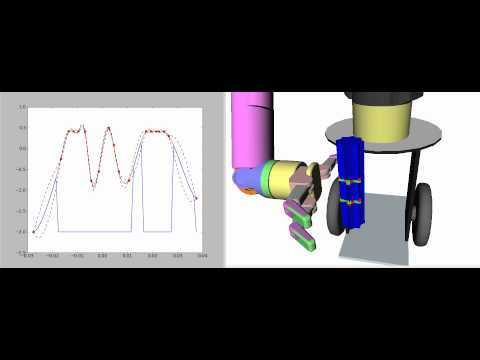

In [1]:
# Example of simulated robot learning to grasp novel object
from IPython.display import YouTubeVideo

YouTubeVideo("R3wIEzkv4Pg")

Check for understanding
------

When do you stop Bayesian optimization?

1. When you get a good answer with high confidence
2. Pre-specified number of iterations
3. Run out of budget (say serving low latency ads)

Tips and tricks
-----

Unfortunately, it is not always that easy to get such good results with Bayesian optimization.




1) Choose an appropriate scale for your features

There is tension between choosing everything and limiting the spread.

There is often combinatorial explosiong with search.

2) Kernel of the GP 

[Example Kernels](http://www.cs.toronto.edu/~duvenaud/cookbook/)

[more on kernels](https://arxiv.org/pdf/1302.4245.pdf)

Different kernels have a drastic effect on the performance of the search algorithm. Each kernel implicitly assumes different properties on the loss ff, in terms of differentiability and periodicity.

3) Uniqueness of features

Often features are correlated.

A solution is to add jitter (noise) to the diagonal of the covariance matrix. 

End-to-end website optimization
-------

I predict in the future we could create a single giant features space then use Bayesian Optimization to efficiently sample from it.

Imagine a system that:

1. Generates its own candidate tests
2. Dynamically runs the experiments
3. Automatically picks winners

No Product Managers, No Data Scientists, No Vice Presidents.

Lights out manufacturing for websites. Liberate websites!

<center><h2>Bayesian Optimization for Hyperparameter Tuning of machine learning models</h2></center>

Bayesian Optimization is a general method that can tune any black box function.

ML hyperparameter - can repeatedly sample but it is expensive. It is nested loop problem (hyperparameter search, then parameter search).

<center><h2>Takeaways</h2></center>

- Bayesian Optimization (BO) is a method for efficient search of any space.
- BO uses a Gaussian Process (GP). GP extend Gaussian Distributions to be functions.
- The level of uncertainty in the spaces that reduce through sampling.
- We pick the next best place to sample with Expected Improvement (EI) function, which balances best outcomes and reducing uncertainty.
- BO is still immature (i.e., tricky) in application.

<center><h2>Sources of Inspiration</h2></center>

- https://distill.pub/2020/bayesian-optimization/
- [Taking the Human Out of the Loop: A Review of Bayesian Optimization](https://ieeexplore.ieee.org/document/7352306) by Shahriari et al.
-  A Tutorial on Bayesian Optimization for Machine Learning by Adams
- [Tutorial: Bayesian Optimization](https://www.youtube.com/watch?v=c4KKvyWW_Xk) by Frazier

<br>

Bonus Material
---

Creating a BO model
------

Assume we have a normal likelihood with noise:  
<br>
y = f(__x__) + ε, ε ~ N(f(__x__), σ<sup>2</sup><sub>ε</sub>)

Bayesian optimization steps
------

1) Given observed values f(x), update the posterior expectation of f using the GP model


2) Find x<sub>new</sub> that maximises the EI: x<sub>new</sub> = argmax EI(x)

3) Compute the value of f for the point x<sub>new</sub>

or in Bayesian terms:  
<br>
y | f ~ N( f(__x__), σ<sup>2</sup><sub>ε</sub>)

For the prior distribution, we assume that the loss function f can be described by a Gaussian process (GP). 

Other Activation Functions
------
<br>
<center><img src="images/act.png" width="700"/></center>

<br>
<br>